In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# memanggil data set lewat gdrive
path = "/content/gdrive/MyDrive/MachineLearning/praktikum11/"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

plt.rcParams['figure.figsize'] = (8, 6)


In [4]:
wine = load_wine()

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
# Informasi umum dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [6]:
# Statistik deskriptif
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [7]:
# Mengecek apakah ada nilai kosong
df.isnull().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


In [8]:
# Mengecek data duplikat
df.duplicated().sum()

np.int64(0)

In [9]:
# Mengecek distribusi label target
df['target'].value_counts()

,count
target,
1,71
0,59
2,48


In [11]:
# Fitur dan label
X = wine.data            # bisa juga: df[wine.feature_names].values
y = wine.target          # df['target'].values

print("Shape X:", X.shape)   # (178, 13)
print("Shape y:", y.shape)   # (178,)

Shape X: (178, 13)
Shape y: (178,)


In [25]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Shape X_train:", X_train.shape)
print("Shape X_test :", X_test.shape)

Shape X_train: (142, 13)
Shape X_test : (36, 13)


In [15]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)   # fit + transform untuk data train
X_test_scaled = scaler.transform(X_test)         # hanya transform data test

X_train_scaled[:5]

array([[ 1.66529275, -0.60840587,  1.21896194,  1.60540017, -0.16738426,
         0.80400157, -0.6916784 ,  1.26722552,  1.8775398 ,  3.41947305,
        -1.65632857, -0.87940904, -0.24860607],
       [-0.54952506,  2.7515415 ,  1.00331502,  1.60540017, -0.30437887,
        -0.78538376, -1.40123291,  2.04959953, -0.87350523, -0.0248012 ,
        -0.58463272, -1.25462095, -0.72992237],
       [-0.74531007, -1.14354109, -0.93750727, -0.28270426, -0.8523573 ,
         1.93702874,  1.7467906 , -1.00165913,  0.58798744, -0.24006834,
         0.35845962,  0.2462267 , -0.24860607],
       [ 0.61294837, -0.61717858,  1.00331502,  0.87920616, -0.78385999,
         0.4892718 , -0.90154664,  1.18898812,  1.17258451,  2.8813052 ,
        -1.65632857, -1.12955031, -0.38138298],
       [ 0.11124931, -0.76631462, -0.93750727, -1.15413707, -0.16738426,
         0.17454204,  0.63748708, -0.68870952, -0.40926638, -0.58449577,
         0.95860929,  0.1350528 ,  0.94638614]])

In [16]:
# Model SVM tanpa PCA
svm_no_pca = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_no_pca.fit(X_train_scaled, y_train)

# Prediksi dan evaluasi
y_pred_no_pca = svm_no_pca.predict(X_test_scaled)
acc_no_pca = accuracy_score(y_test, y_pred_no_pca)

print("Akurasi SVM tanpa PCA:", acc_no_pca)
print("\nClassification Report (Tanpa PCA):")
print(classification_report(y_test, y_pred_no_pca, target_names=wine.target_names))

Akurasi SVM tanpa PCA: 1.0

Classification Report (Tanpa PCA):
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [18]:
# PCA dengan 3 komponen utama
pca = PCA(n_components=3)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

print("Shape X_train_pca:", X_train_pca.shape)   # (n_train, 3)
print("Shape X_test_pca :", X_test_pca.shape)    # (n_test, 3)

Shape X_train_pca: (142, 3)
Shape X_test_pca : (36, 3)


In [19]:
# Variansi yang dijelaskan oleh tiap komponen
explained_var = pca.explained_variance_ratio_
print("Explained Variance Ratio tiap komponen:", explained_var)
print("Total variansi yang dijelaskan 3 komponen pertama:", explained_var.sum())

Explained Variance Ratio tiap komponen: [0.35900066 0.18691934 0.11606557]
Total variansi yang dijelaskan 3 komponen pertama: 0.6619855707386524


In [20]:
svm_pca = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_pca.fit(X_train_pca, y_train)

y_pred_pca = svm_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

print("Akurasi SVM dengan PCA:", acc_pca)
print("\nClassification Report (Dengan PCA):")
print(classification_report(y_test, y_pred_pca, target_names=wine.target_names))

Akurasi SVM dengan PCA: 1.0

Classification Report (Dengan PCA):
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



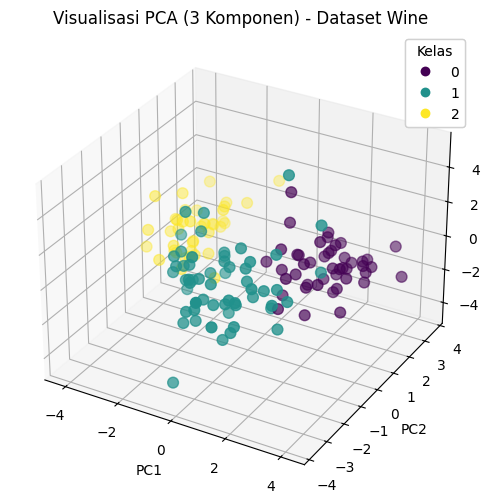

In [21]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_train_pca[:, 0],
    X_train_pca[:, 1],
    X_train_pca[:, 2],
    c=y_train,
    s=60
)

ax.set_title('Visualisasi PCA (3 Komponen) - Dataset Wine')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

legend = ax.legend(*scatter.legend_elements(), title="Kelas")
ax.add_artist(legend)

plt.show()

In [22]:
# Membandingkan hasil model tanpa dan dengan PCA
comparison = pd.DataFrame({
    'Model': ['SVM Tanpa PCA', 'SVM Dengan PCA (3 Komponen)'],
    'Jumlah Fitur': [X_train_scaled.shape[1], X_train_pca.shape[1]],
    'Akurasi': [acc_no_pca, acc_pca],
    'Variansi Total PCA': [None, explained_var.sum()]
})

comparison

,Model,Jumlah Fitur,Akurasi,Variansi Total PCA
0,SVM Tanpa PCA,13,1.0,NaN
1,SVM Dengan PCA (3 Komponen),3,1.0,0.661986


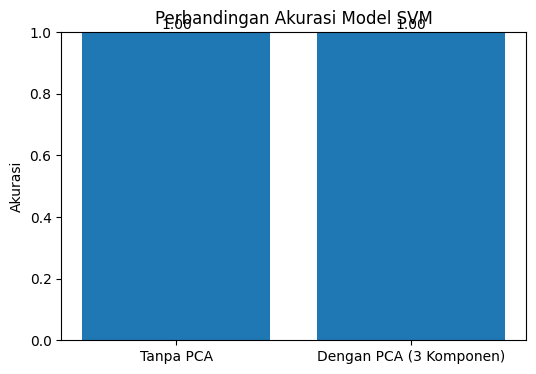

In [24]:
plt.figure(figsize=(6,4))
plt.bar(['Tanpa PCA', 'Dengan PCA (3 Komponen)'], [acc_no_pca, acc_pca])
plt.title('Perbandingan Akurasi Model SVM')
plt.ylabel('Akurasi')
plt.ylim(0, 1)
for i, v in enumerate([acc_no_pca, acc_pca]):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')

plt.show()